In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [20,10]
from NetEmbs.DataProcessing.connect_db import *
from NetEmbs.DataProcessing.stats import getHistCounts
from NetEmbs.DataProcessing.prepare_data import prepare_data
from NetEmbs.Vis.plots import plotHist
from NetEmbs.Vis.helpers import set_font

In [3]:
sim_d = prepare_data(upload_data("Simulation/FSN_Data.db", None))
sim_d.head(2)

Original shape of DataFrame is  (61383, 4)
Deleted all NaNs and Strings values from 'Value' column:  (61383, 4)
Before merging FAs columns titles are:  ['ID', 'Name', 'FA_Name', 'Value', 'Debit', 'Credit']
After merging FAs columns titles are:  ['ID', 'FA_Name', 'Credit', 'Debit', 'Name', 'Value']  shape is  (61383, 6)
After normalization shape of DataFrame is  (61383, 7)
Final shape of DataFrame is  (52884, 8)


,ID,Signature,FA_Name,Credit,Debit,Name,Value,from
0,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",Revenue,0.943562,0.0,Revenue_5,-788.000000,True
1,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",Tax,0.056438,0.0,Tax_5,-47.132907,True


In [23]:
import pandas as pd
def get_left_right(df):
    """
    Helper function for counting left-hand and right-hand account for BP
    :param df: grouped object
    :return: Series with number of FA on the left side and on the right side
    """
    return pd.Series({"Left": df[df["from"] == True].count()[0], "Right": df[df["from"] == False].count()[0]})

stat = sim_d.groupby("ID", as_index=False).apply(get_left_right)

In [5]:
stat_here = getHistCounts(sim_d)

In [48]:
def plotHist(df, title="Histogram", normalized=False):
    stat_here = getHistCounts(df)
    from matplotlib.ticker import MaxNLocator
    for k, d in stat_here.items():
        ax = plt.figure().gca()
        if normalized:
            import numpy as np
            ax.bar(d.keys(), list(d.values())/np.sum(list(d.values())))
        else:
            ax.bar(d.keys(), d.values())
        ax.set_xlim((0.5,10.5))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.title(k + "-side number of FAs")
        if title is not None and isinstance(title, str):
            plt.tight_layout()
            plt.savefig("img/" + title + k, dpi=140, pad_inches=0.01)

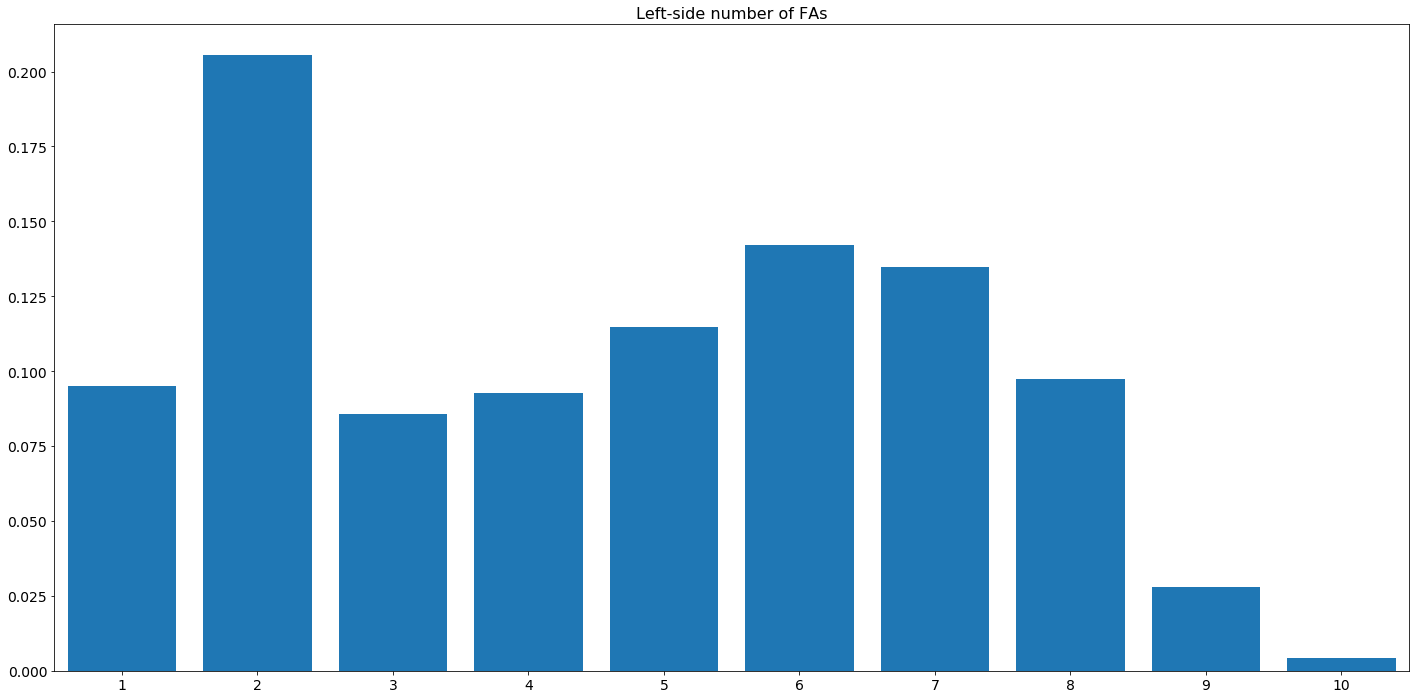

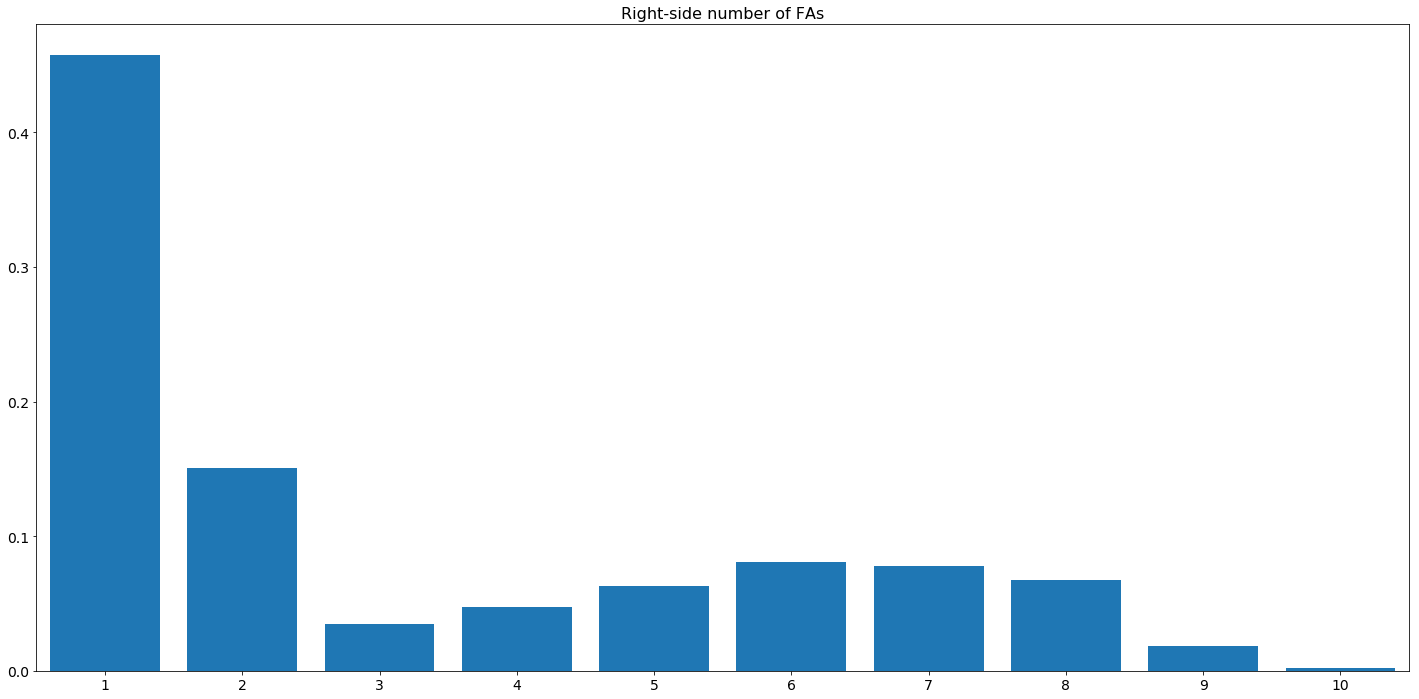

In [4]:
set_font(16)
plotHist(sim_d, title="SimHist", normalized=True)

In [8]:
from NetEmbs.FSN import *
fsn = FSN()
fsn.build(sim_d, left_title="FA_Name")

In [10]:
len(fsn.get_BP()), len(fsn.get_FA())

(6867, 31059)

## Real data stat by Marcel

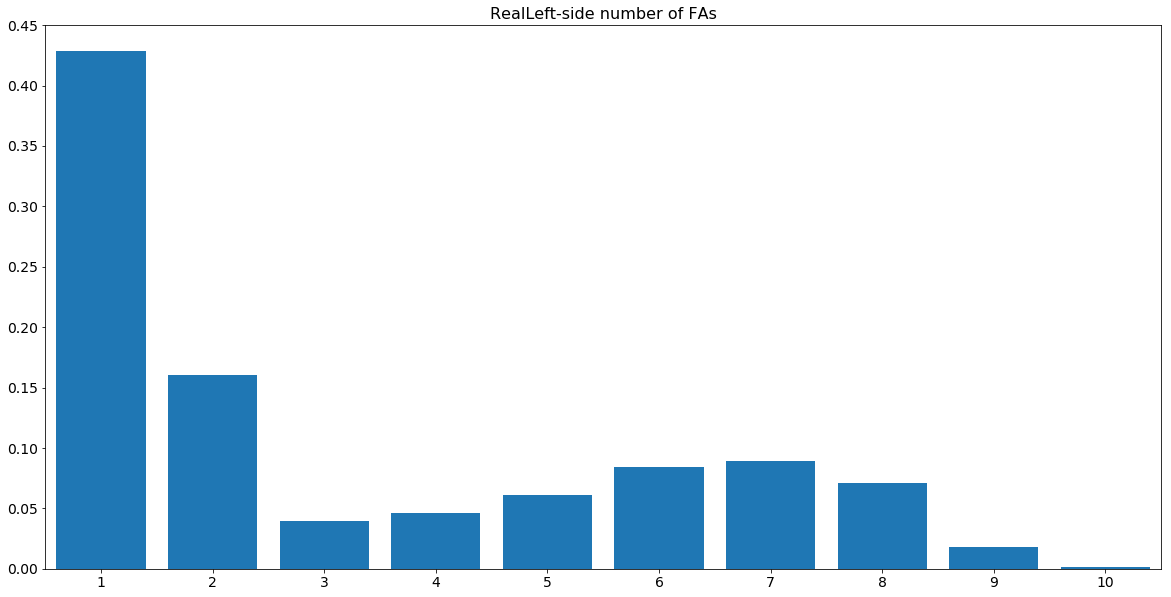

In [108]:
real_left = {1: 2400, 2: 900, 3: 220, 4:260, 5:340, 6:470, 7:500, 8:400, 9:100, 10:10}
ax = plt.figure().gca()
ax.bar(real_left.keys(), list(real_left.values())/np.sum(list(real_left.values())))
ax.set_xlim((0.5,10.5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("RealLeft-side number of FAs")
plt.show()

In [109]:
left_probas = list(real_left.values())/np.sum(list(real_left.values()))

In [110]:
dict(zip(range(1, 11), left_probas))

{1: 0.42857142857142855,
 2: 0.16071428571428573,
 3: 0.039285714285714285,
 4: 0.04642857142857143,
 5: 0.060714285714285714,
 6: 0.08392857142857142,
 7: 0.08928571428571429,
 8: 0.07142857142857142,
 9: 0.017857142857142856,
 10: 0.0017857142857142857}

In [81]:
test_p = list()
for _ in range(1000):
    test_p.append(np.random.choice(list(real_left.keys())[2:], p=left_probas))

In [82]:
from collections import Counter
cnt = Counter(test_p)

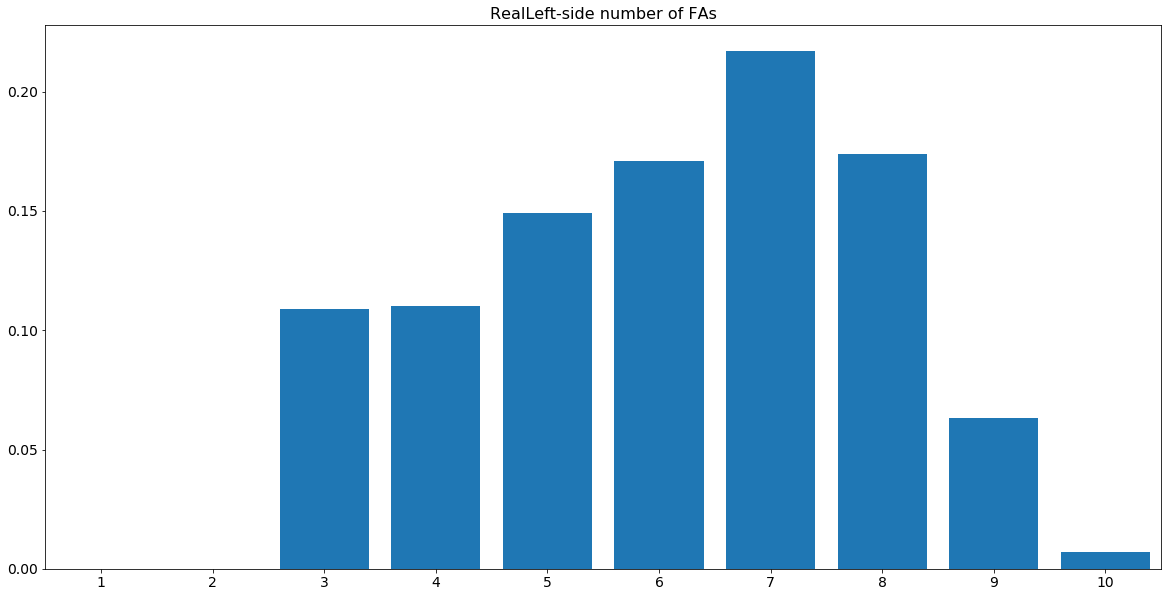

In [83]:
ax = plt.figure().gca()
ax.bar(cnt.keys(), list(cnt.values())/np.sum(list(cnt.values())))
ax.set_xlim((0.5,10.5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("RealLeft-side number of FAs")
plt.show()

In [94]:
real_left = {1: 0.2455795677799607,
             2: 0.137524557956778,
             3: 0.06286836935166994,
             4: 0.07072691552062868,
             5: 0.08644400785854617,
             6: 0.11787819253438114,
             7: 0.137524557956778,
             8: 0.09823182711198428,
             9: 0.03929273084479371,
             10: 0.003929273084479371}

ks, pds = [0, 0] + list(range(1, 9)), list(real_left.values())
print(ks, pds)

[0, 0, 1, 2, 3, 4, 5, 6, 7, 8] [0.2455795677799607, 0.137524557956778, 0.06286836935166994, 0.07072691552062868, 0.08644400785854617, 0.11787819253438114, 0.137524557956778, 0.09823182711198428, 0.03929273084479371, 0.003929273084479371]


In [102]:
test_p = list()
for _ in range(1000):
    test_p.append(np.random.choice(ks, p=pds))
cnt = Counter(test_p)
cnt

Counter({0: 373, 6: 99, 3: 82, 2: 81, 4: 117, 5: 138, 7: 34, 1: 72, 8: 4})